# Evaluation

In [136]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

## Load test data

In [137]:
_, (test_images, test_labels) = datasets.cifar10.load_data()


## Load models

We are evaluating the following models:

1. Basic model with dropout
2. Batch normalisation
3. Increased dropout
4. Final model

In [138]:
models = {}


# Sample data
import numpy as np
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.9, 0.8, 0.6, 0.55])
######################

## Evaluate models

In [139]:
models = ["Basic", "Batch", "Incrased Dropout", "Final"]
x_pos = [i for i, _ in enumerate(models)]

def create_figure():
    plt.style.use('ggplot')
    fig, ax = plt.subplots()
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models)
    ax.set_xlabel('Models')
    return fig, ax


### Loss

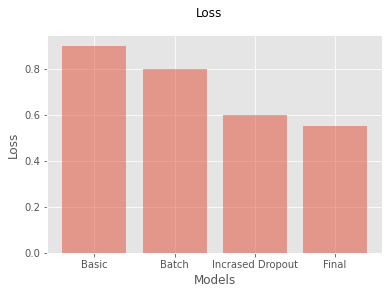

In [140]:
fig, ax = create_figure()
fig.suptitle("Loss")
ax.bar(x_pos, y, align='center', alpha=0.5)
ax.set_ylabel("Loss")

plt.savefig("evaluation/loss.png")
plt.show()

### Accuracy

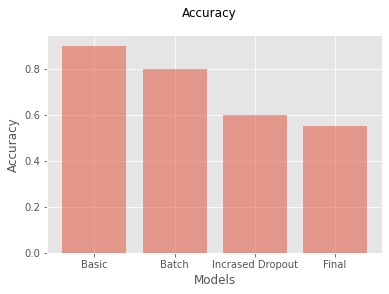

In [141]:
fig, ax = create_figure()
ax.bar(x_pos, y, align='center', alpha=0.5)
ax.set_ylabel("Accuracy")
fig.suptitle("Accuracy")

plt.savefig("evaluation/accuracy.png")
plt.show()